In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [12]:
os.listdir() # para listar archivos en el directorio

In [14]:
# vamos a trabajar con los datos en datos_solares.csv
df = pd.read_csv('datos_solares.csv')
df.describe()

,Potencia posible,Potencia real,Temperatura ambiente,Irradiancia panel [kWh/m2],Irradiancia horizontal [kWh/m2]
count,16135.000000,16135.000000,16135.000000,16135.000000,16135.000000
mean,24.767906,21.804508,13.653796,302.809854,245.342175
std,43.636281,38.471152,8.435715,372.866417,326.713955
min,0.000000,0.000000,-4.000000,-2.000000,-7.000000
25%,0.000000,0.000000,8.000000,4.000000,0.000000
50%,0.061000,0.012000,13.000000,8.000000,2.000000
75%,25.035000,25.500000,18.000000,756.000000,538.000000
max,191.741000,179.301000,45.000000,1027.000000,985.000000


In [15]:
df.columns

Index(['Fecha-hora', 'PARQUE', 'Potencia posible', 'Potencia real',
       'Temperatura ambiente', 'Irradiancia panel [kWh/m2]',
       'Irradiancia horizontal [kWh/m2]'],
      dtype='object')

In [16]:
# se puede acceder a cada una de las columnas del dataframe
# al igual que a los valores de un diccionario: los nombres
# de las columnas actúan como claves (keys) de cada columna

df['PARQUE']

0           MALARGUE
1           MALARGUE
2           MALARGUE
3           MALARGUE
4           MALARGUE
            ...     
16130    SIERRAS ULL
16131    SIERRAS ULL
16132    SIERRAS ULL
16133    SIERRAS ULL
16134    SIERRAS ULL
Name: PARQUE, Length: 16135, dtype: object

In [17]:
ds_parques = df['PARQUE']
type(ds_parques)

pandas.core.series.Series

In [24]:
lista_parques = ds_parques.to_list()
type(lista_parques)

list

In [25]:
len(lista_parques)

16135

In [27]:
lista_parques[0:10]

['MALARGUE',
 'MALARGUE',
 'MALARGUE',
 'MALARGUE',
 'MALARGUE',
 'MALARGUE',
 'MALARGUE',
 'MALARGUE',
 'MALARGUE',
 'MALARGUE']

In [33]:

aux = lista_parques[0]
print(aux)
lista_no_repetidos = [aux]
for i in lista_parques:
    if i is not aux:
        print(i)
        aux = i
        lista_no_repetidos += [aux]
        

MALARGUE
PSANCH
PSTOC III
PSULLUM I
PSULLUM II
PSULLUM III
SIERRAS ULL


In [ ]:
[1,2,3] + [4, 5, 6]
# [1, 2, 3] + 'damian'  # no se puede sumar (obsjetos distintos)

In [34]:
lista_no_repetidos

['MALARGUE',
 'PSANCH',
 'PSTOC III',
 'PSULLUM I',
 'PSULLUM II',
 'PSULLUM III',
 'SIERRAS ULL']

In [35]:
ds_parques.unique()

array(['MALARGUE', 'PSANCH', 'PSTOC III', 'PSULLUM I', 'PSULLUM II',
       'PSULLUM III', 'SIERRAS ULL'], dtype=object)

In [36]:
# crear un nuevo dataframe con el resto de las columnas y solamente las
# filas que corresponden a, por ejemplo, Malargüe

In [41]:
# repaso
# buscar valores en numpy
mat = np.random.randint(1, 4, (4, 4))
print(mat)
mat == 3  # devuelve una matriz de dimensión igual a mat con true o false según corresponda

[[2 3 1 2]
 [2 3 1 2]
 [1 3 3 1]
 [1 3 1 1]]


array([[False,  True, False, False],
       [False,  True, False, False],
       [False,  True,  True, False],
       [False,  True, False, False]])

In [42]:
mat[ mat==3 ]

array([3, 3, 3, 3, 3])

In [46]:
array_binario_mala = (ds_parques == lista_no_repetidos[0])
type(array_binario_mala)

pandas.core.series.Series

In [81]:
df_mala = df[array_binario_mala]
df_mala = df_mala.drop(columns='PARQUE') # saco columna '
# df_mala.drop(columns='PARQUE', inplace = True)
df_mala.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304],
      dtype='int64', length=2305)

In [83]:
# redefino el índice
# df_mala.index = df_mala['Fecha-hora']   # una manera

# df_mala = df_mala.set_index('Fecha-hora')
# df_mala.index = pd.DatetimeIndex(df_mala.index)

df_mala.set_index(pd.DatetimeIndex(df_mala['Fecha-hora']), inplace=True)

<Axes: xlabel='Fecha-hora'>

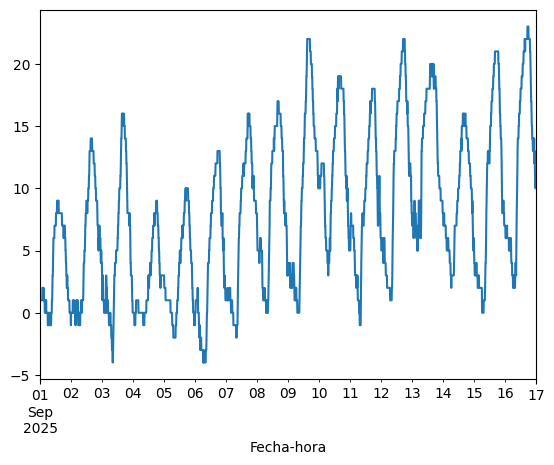

In [85]:
df_mala['Temperatura ambiente'].plot()

In [86]:
df_mala['Temperatura ambiente'].to_numpy()

array([ 1,  1,  1, ..., 10, 11, 11], shape=(2305,))

In [87]:
df_mala.index.day   # me devuelve un array con cada día

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       16, 16, 16, 16, 16, 16, 16, 16, 16, 17],
      dtype='int32', name='Fecha-hora', length=2305)